In [26]:
# Import packages 
import pandas as pd 
import numpy as np 

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load csv file into data frame 
df = pd.read_csv(r"C:\Users\nguye\Downloads\tiktok_dataset.csv")

In [4]:
df.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [91]:
# check for missing values
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
likes_per_view              298
comment_per_view            298
shares_per_view             298
dtype: int64

In [98]:
# Check for duplicates
df.duplicated().sum()

0

In [93]:
# drop row with missing values
df = df.dropna(axis=0)
df.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
likes_per_view              0
comment_per_view            0
shares_per_view             0
dtype: int64

In [6]:
df.shape

(19382, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB



The dataframe contains a collection of categorical, text, and numerical data. Each row represents a distinct TikTok video that presents either a claim or an opinion and the accompanying metadata about that video.

The dataframe contains five float64s, three int64s, and four objects. There are 19,382 observations, but some of the variables are missing values, including claim status, the video transcripton, and all of the count variables.

Many of the count variables seem to have outliers at the high end of the distribution. They have very large standard deviations and maximum values that are very high compared to their quartile values.

 #### Investigate the variables

In [8]:
#claim_status values and count them. It is quite balanced
df['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

In [9]:
df.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [13]:
# Average of view count with different claim status
claims_average = df.groupby('claim_status').mean()[['video_view_count']].reset_index()
claims_average

,claim_status,video_view_count
0,claim,501029.452748
1,opinion,4956.432250


In [14]:
# Average of view count with different claim status
claims_mean = df.groupby('claim_status').median()[['video_view_count']].reset_index()
claims_mean

,claim_status,video_view_count
0,claim,501555.0
1,opinion,4953.0


The mean and the median within each claim category are close to one another, but there is a vast discrepancy between view counts for videos labeled as claims and videos labeled as opinions.


In [15]:
# Get counts for each group combination of claim status and author ban status

df.groupby(['claim_status','author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

There are many more claim videos with banned authors than there are opinion videos with banned authors. This could mean a number of things, including the possibilities that:
* Claim videos are more strictly policed than opinion videos
* Authors must comply with a stricter set of rules if they post a claim than if they post an opinion

Also, it should be noted that there's no way of knowing if claim videos are inherently more likely than opinion videos to result in author bans, or if authors who post claim videos are more likely to post videos that violate terms of service.


In [16]:
df.groupby('author_ban_status').agg(
    {'video_view_count':['mean','median'],
     'video_like_count':['mean','median'],
     'video_share_count':['mean','median']}).reset_index()

author_ban_status video_view_count           video_like_count            \
                                mean    median             mean    median   
0            active    215927.039524    8616.0     71036.533836    2222.0   
1            banned    445845.439144  448201.0    153017.236697  105573.0   
2      under review    392204.836399  365245.5    128718.050339   71204.5   

  video_share_count           
               mean   median  
0      14111.466164    437.0  
1      29998.942508  14468.0  
2      25774.696999   9444.0

Banned authors have a median share count that's 33 times the median share count of active authors! Explore this in more depth.

 Banned authors and those under review get far more views, likes, and shares than active authors.

In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.

In [23]:
# Create a likes_per_view column
df['likes_per_view'] = df['video_like_count'] / df['video_view_count']

# Create a comments_per_view column
df['comment_per_view'] = df['video_comment_count'] / df['video_view_count']

# Create a shares_per_view column
df['shares_per_view'] = df['video_share_count'] / df['video_view_count']

In [25]:
df.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view' : ['count','mean','median'],
     'comment_per_view' : ['count','mean','median'],
     'shares_per_view' : ['count','mean','median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comment_per_view                      \
                                          count      mean    median   
claim_status author_ban_status                                        
claim        active                        6566  0.001393  0.000776   
             banned                        1439  0.001377  0.000746   
             under review                  1603  0.001367  0.000789   
opinion      active                        8817  0.000517  0.000252   
             banned                         196  0.000434  0.000193   
             under review                   463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

We know that videos by banned authors and those under review tend to get far more views, likes, and shares than videos by non-banned authors. 

Also, we know that claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.

Engagement level is strongly correlated with claim status

Videos with banned authors have significantly higher engagement than videos with active authors


### **Build visualizations**

#### **video_duration_sec**

<AxesSubplot:title={'center':'video_duration_sec'}, xlabel='video_duration_sec'>

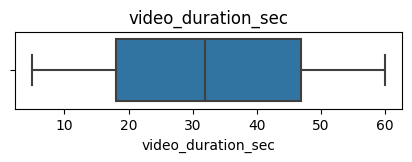

In [29]:
# Create a boxplot to visualize distribution of video_duration_sec
plt.figure(figsize=(5,1))
plt.title('video_duration_sec')
sns.boxplot(x=df['video_duration_sec'])

Text(0.5, 1.0, 'Video duration histogram')

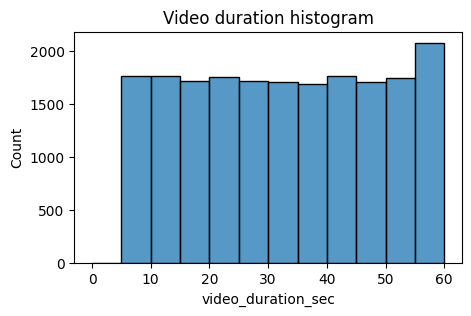

In [30]:
#Create a histogram of video_duration_sec to see the distribution
plt.figure(figsize=(5,3))
sns.histplot(data = df,x='video_duration_sec', bins=range(0,61,5))
plt.title('Video duration histogram')

All videos are 5-60 seconds in length, and the distribution is uniform

#### Video_view_count

<AxesSubplot:title={'center':'Video_view_count'}, xlabel='video_view_count'>

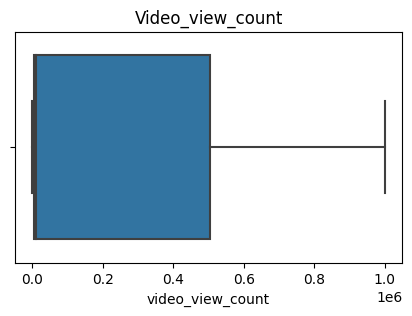

In [31]:
# Create a boxplot to visualize distribution of video_view_count
plt.figure(figsize=(5,3))
plt.title('Video_view_count')
sns.boxplot( data = df, x = 'video_view_count')

Text(0.5, 1.0, 'Video view count histogram')

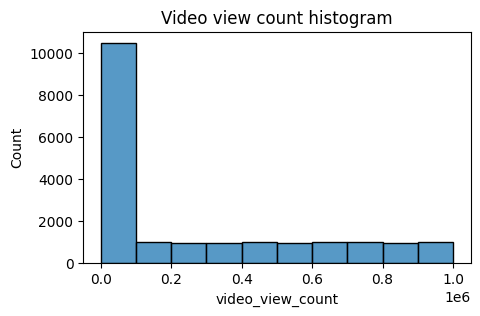

In [34]:
# Create histogram of video_view_count
plt.figure(figsize=(5,3))
sns.histplot(data= df, x= 'video_view_count', bins= range(0,(10**6+1),10**5))
plt.title('Video view count histogram')

This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

#### **video_like_count**

Create a box plot to examine the spread of values in the video_like_count column

<AxesSubplot:title={'center':'video_like_count'}, xlabel='video_like_count'>

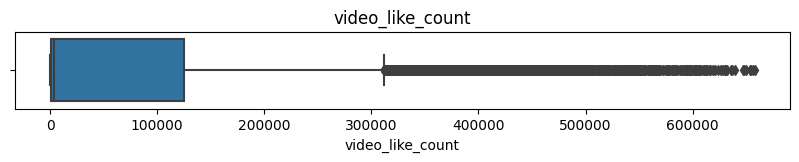

In [35]:
# Create a boxplot to visualize distribution of video_like_count
plt.figure(figsize=(10,1))
plt.title('video_like_count')
sns.boxplot(data= df, x='video_like_count')

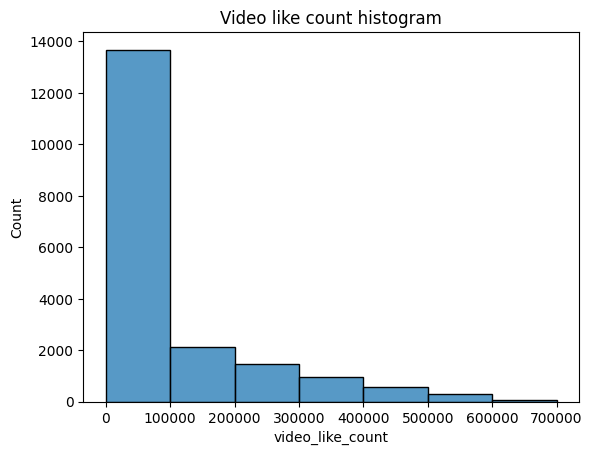

In [ ]:
# Create histogram to show the distribution of video_like_count
sns.histplot(data=df, x = 'video_like_count', bins= range(0,(7*10**5+1), 10**5))
plt.title('Video like count histogram');


#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.

<AxesSubplot:title={'center':'video_comment_count'}, xlabel='video_comment_count'>

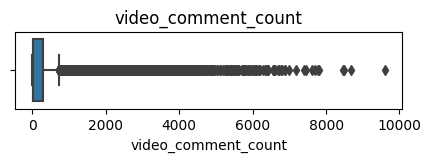

In [45]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,1))
plt.title('video_comment_count')
sns.boxplot(data=df, x='video_comment_count')

Text(0.5, 1.0, 'Video comment count histogram')

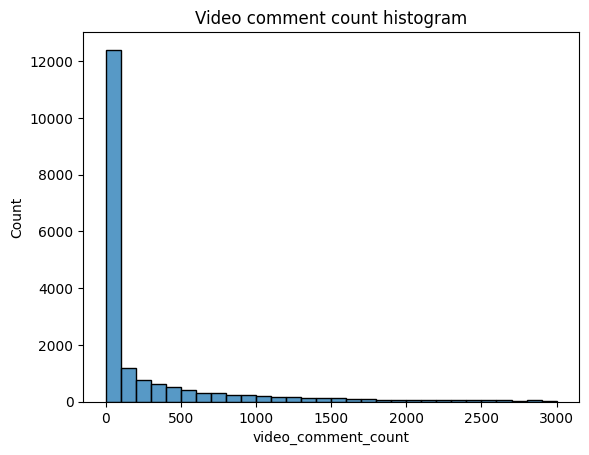

In [46]:
# Create histogram of video_comment_count
sns.histplot(data= df, x= 'video_comment_count', bins=range(0,3001,100))
plt.title('Video comment count histogram')

The vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

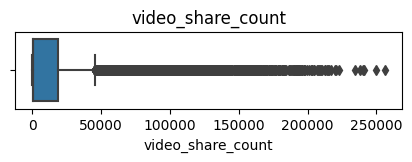

In [52]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(data=df,x='video_share_count');

Create a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

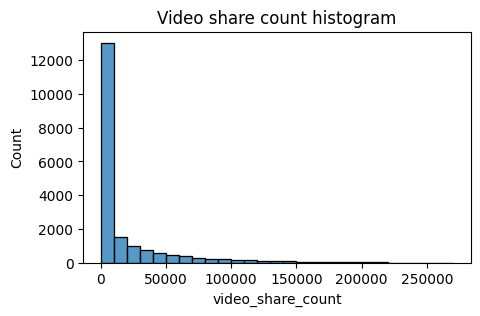

In [48]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video share count histogram');

The overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

<AxesSubplot:title={'center':'Video_download_count'}, xlabel='video_download_count'>

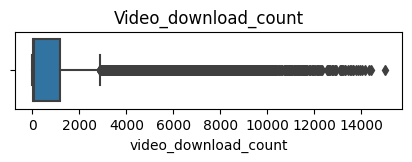

In [53]:
# Create a boxplot to visualize distribution of video_download_count
plt.figure(figsize=(5,1))
plt.title('Video_download_count')
sns.boxplot(data= df, x = 'video_download_count')

Text(0.5, 1.0, 'video download count histogram')

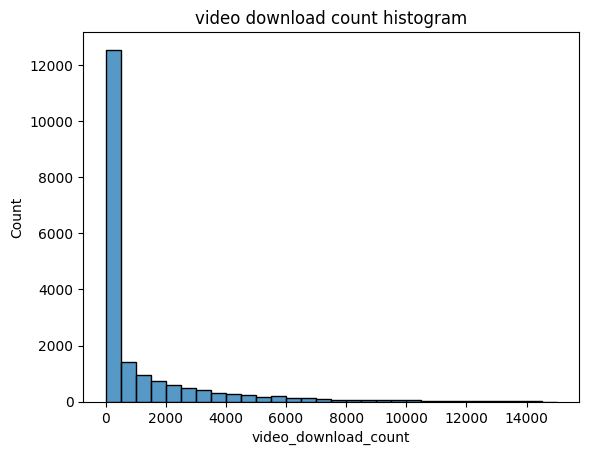

In [56]:
# Create a histogram of video_download_count 

sns.histplot(data= df, x = 'video_download_count', bins=range(0,15001,500))
plt.title('video download count histogram')

The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

#### **Claim status by verification status**



Text(0.5, 1.0, 'Claims by verification status histogram')

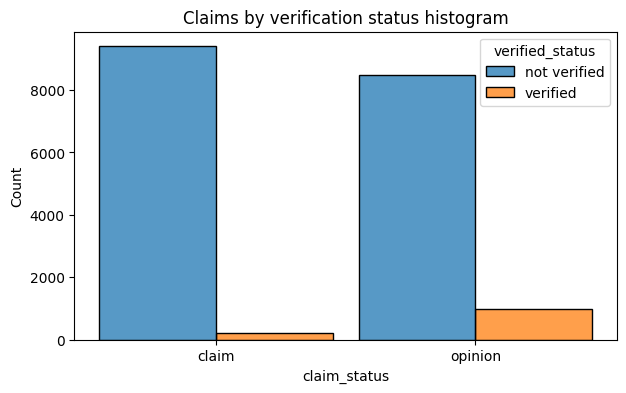

In [62]:
plt.figure(figsize=(7,4))
sns.histplot(data = df, x = 'claim_status',hue = 'verified_status', multiple= 'dodge',shrink=0.9)
plt.title('Claims by verification status histogram')

There are far fewer verified users than unverified users, but if a user *is* verified, they are much more likely to post opinions.

#### **Claim status by author ban status**


<AxesSubplot:xlabel='claim_status', ylabel='Count'>

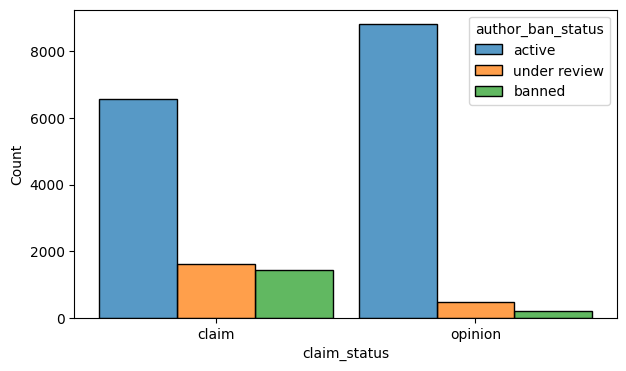

In [63]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data = df, x ='claim_status', hue= 'author_ban_status',
             multiple='dodge',
             hue_order=['active','under review','banned'], shrink=0.9)

For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar correspond with the median number of views for all videos with that author ban status.

<AxesSubplot:xlabel='author_ban_status', ylabel='video_view_count'>

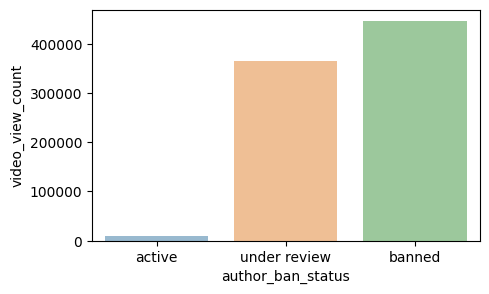

In [70]:
ban_status_counts = df.groupby(['author_ban_status']).median(numeric_only=True).reset_index()

plt.figure(figsize=(5,3))
sns.barplot(data= ban_status_counts, x = 'author_ban_status', y = 'video_view_count',
            order=['active','under review','banned'],
            alpha =0.5)

The median view counts for non-active authors are many times greater than the median view count for active authors. Since non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then `video_view_count` might be a good indicator of claim status.


In [74]:
# check of the median view count by claim status
view_by_claim_status = df.groupby('claim_status')['video_view_count'].median()

view_by_claim_status_total = df.groupby('claim_status')['video_view_count'].sum()


#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

Text(0.5, 1.0, 'Total views by video claim status')

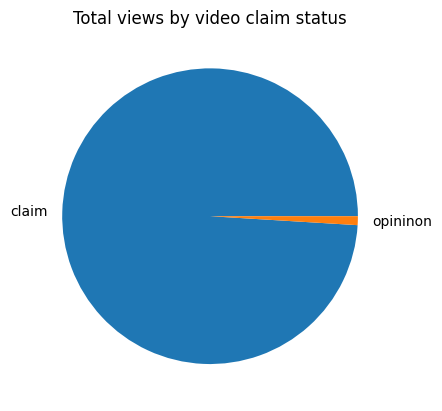

In [77]:
plt.pie(x= view_by_claim_status_total, labels= ['claim','opininon'])
plt.title('Total views by video claim status')

The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

### **Determine outliers**


In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. To modify the outlier threshold, calculating the **median** value for each variable and then adding 1.5 * IQR. 

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"


In [81]:
count_cols = ['video_view_count', 'video_like_count','video_share_count','video_download_count','video_comment_count']

for column in count_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values  that exceed the outlier threshold
    outlier_count = (df[column] > outlier_threshold).sum()
    print(f'Number of outlier, {column}:', outlier_count)

Number of outlier, video_view_count: 2343
Number of outlier, video_like_count: 3468
Number of outlier, video_share_count: 3732
Number of outlier, video_download_count: 3733
Number of outlier, video_comment_count: 3882


#### **Scatterplot**

<AxesSubplot:xlabel='video_view_count', ylabel='video_like_count'>

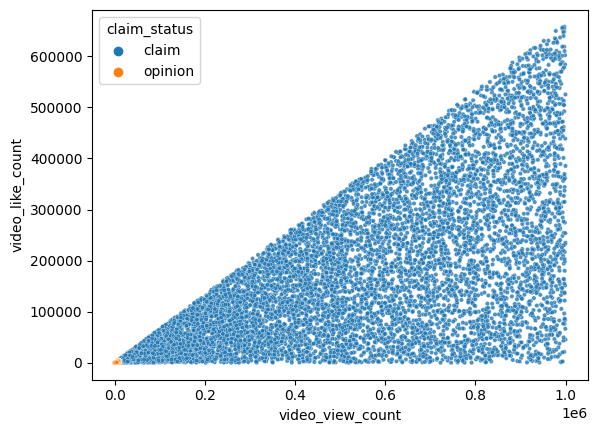

In [90]:
# Create a scatterplot of video_view_count versus video_like_count according to claim_status
sns.scatterplot(data = df, x = 'video_view_count', y = 'video_like_count', hue = 'claim_status', s=10, alpha = 0.8)
